# INSTRUCTIONS:
You are required to come up with the solution of the given business case.

## Business Context:
This case requires trainees to develop a model for predicting customer churn at a
fictitious wireless telecom company and use insights from the model to develop an
incentive plan for enticing would-be churners to remain with company.
Data for the case are available in csv format.
The data are a scaled down version of the full database generously donated by an
anonymous wireless telephone company.
There are still 7043 customers in the database, and 20 potential predictors.
Candidates can use whatever method they wish to develop their machine learning model.
The data are available in one data file with 7043 rows that combines the calibration and
validation customers. “calibration” database consisting of 4000 customers and a
“validation” database consisting of 3043 customers.
Each database contained (1) a “churn” variable signifying whether the customer had left
the company two months after observation, and (2) a set of 20 potential predictor
variables that could be used in a predictive churn model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data.
This case requires both statistical analysis and creativity/judgment. I recommend you
pend much time on both fine-tuning and interpreting results of your machine learning
model.

### Importing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv('Churn.csv')

### Understanding the data

In [130]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [132]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [133]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [134]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors='coerce')

In [135]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')

In [136]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Data Manipulation

In [137]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [138]:
rep_dup = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in rep_dup:
    df[i] = df[i].replace({'No internet service':'No'})
rep_dup2 = ['MultipleLines']
for i in rep_dup2:
    df[i]=df[i].replace({'No phone service':'No'})

In [139]:
rep_dup.extend(('gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','Churn'))

In [140]:
print(rep_dup)

['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'Churn']


In [141]:
df.drop('customerID',axis=1,inplace=True)

In [142]:
df = pd.get_dummies(df,columns=rep_dup, drop_first=True)

In [143]:
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [144]:
df.head()

,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_Yes,Churn_Yes
0,0,1,1,0,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,1,0,0
1,0,34,1,1,1,56.95,1889.50,1,0,1,0,0,0,1,0,0,1,0,0,0
2,0,2,1,0,1,53.85,108.15,1,1,0,0,0,0,1,0,0,1,1,0,1
3,0,45,1,1,2,42.30,1840.75,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,2,0,0,70.70,151.65,0,0,0,0,0,0,0,0,0,1,1,0,1


### Data Visualization

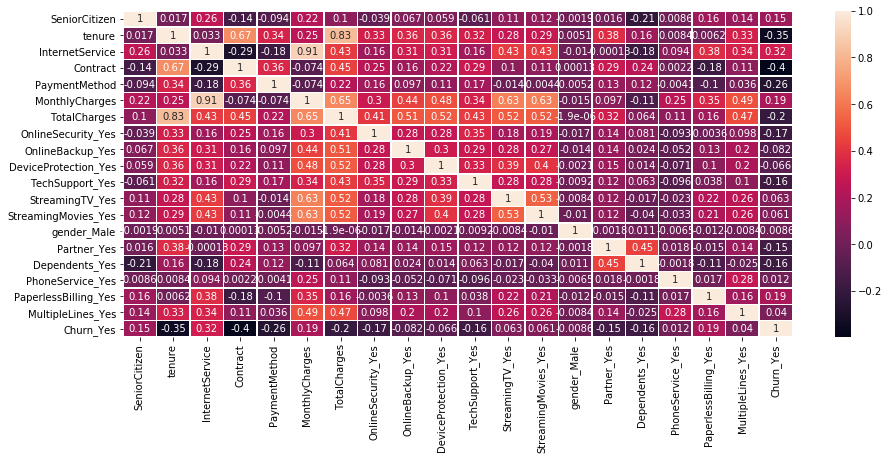

In [145]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

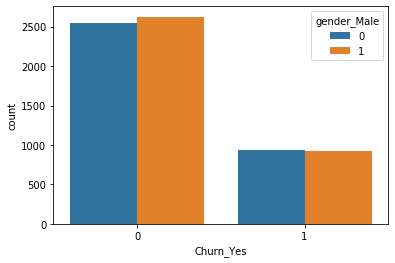

In [147]:
sns.countplot(x='Churn_Yes', hue='gender_Male', data=df)

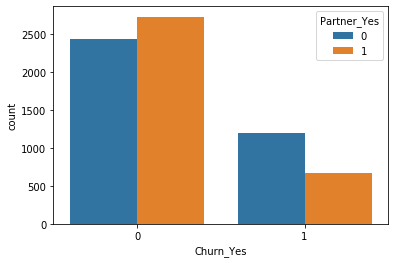

In [148]:
sns.countplot(x='Churn_Yes', hue='Partner_Yes', data=df)

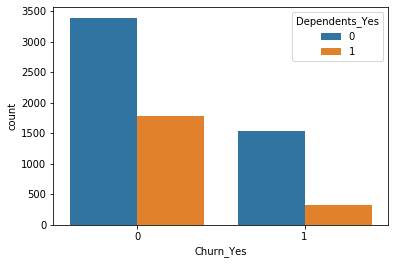

In [149]:
sns.countplot(x='Churn_Yes', hue='Dependents_Yes', data=df)

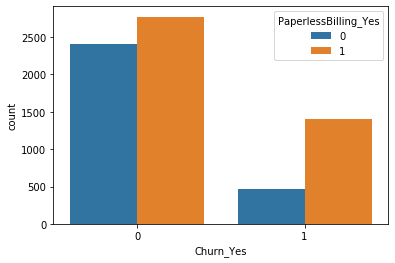

In [150]:
sns.countplot(x='Churn_Yes',hue='PaperlessBilling_Yes',data=df)

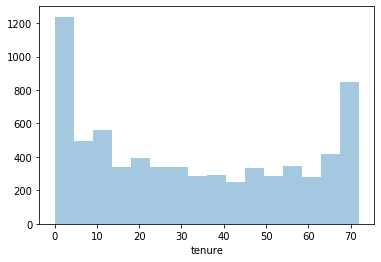

In [151]:
sns.distplot(df['tenure'], kde=False)

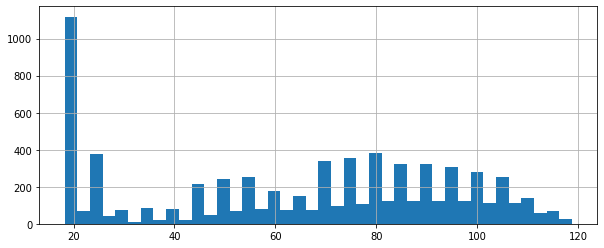

In [152]:
df['MonthlyCharges'].hist(bins=40, figsize=(10,4))

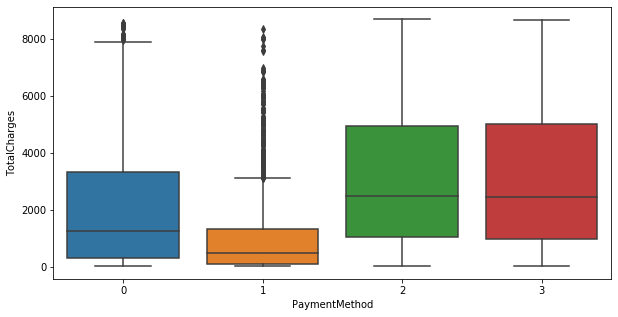

In [153]:
plt.figure(figsize=(10,5))
sns.boxplot(x='PaymentMethod', y='TotalCharges', data=df)

In [1]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [155]:
X = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
logmodel = LogisticRegression()

In [160]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
predicttions = logmodel.predict(X_test)

In [162]:
from sklearn.metrics import classification_report, confusion_matrix 

In [163]:
print(classification_report(y_test,predicttions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1274
           1       0.67      0.53      0.59       487

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [164]:
confusion_matrix(y_test,predicttions)

array([[1145,  129],
       [ 229,  258]], dtype=int64)

### Model Evaluation

### Final Conclusions